In [ ]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()
data = digits.images
y = digits.target
x = digits.data

i = np.where((y==2) |(y==4) | (y== 3))
y_new = np.matrix(y[i])

x_new = x[i]
binary_data = (x_new>7).astype(int)


print(y_new.shape)
print(x_new.shape)
print(y_new)
samples,features = binary_data.shape

(1, 541)
(541, 64)
[[2 3 4 2 3 4 2 3 4 4 3 2 2 2 2 3 3 3 3 4 4 2 2 3 2 4 3 3 4 3 4 3 4 4 2 2
  2 4 4 2 3 4 2 3 4 2 3 4 4 3 2 2 2 2 3 3 3 3 4 4 2 2 3 2 3 3 4 3 4 3 4 4
  2 2 2 4 4 2 3 4 2 3 4 2 3 4 4 3 2 2 2 2 3 3 3 3 4 4 2 2 3 2 4 3 3 4 3 4
  3 4 4 2 2 2 4 4 3 2 3 4 2 3 4 2 3 4 4 3 2 2 2 2 3 3 3 3 4 4 2 2 3 2 4 3
  3 4 3 4 3 4 4 2 2 2 4 4 2 3 4 2 3 4 2 3 4 4 3 2 2 2 2 3 3 3 3 4 4 2 2 3
  2 4 3 3 4 3 4 3 4 4 2 2 2 4 4 2 3 4 2 3 4 2 3 4 4 3 2 2 2 2 3 3 3 3 4 4
  2 2 3 2 4 3 3 4 3 4 3 4 4 2 2 2 4 4 2 3 4 2 3 4 2 3 4 4 3 2 2 2 2 3 3 3
  3 4 4 2 2 3 2 4 3 3 4 3 4 3 4 4 2 2 2 4 4 2 3 4 2 3 4 2 3 4 4 3 2 2 2 3
  3 3 3 4 4 2 2 3 2 4 3 3 4 3 4 3 4 4 2 2 2 4 4 2 3 4 2 3 4 2 3 4 4 3 2 2
  3 3 3 3 4 4 2 2 3 2 4 3 3 4 3 4 3 4 4 2 2 2 4 4 2 3 4 2 3 4 2 3 4 4 3 2
  2 2 2 3 3 3 3 4 4 2 2 3 2 4 3 3 4 3 4 3 4 4 2 2 2 4 4 2 3 4 2 3 4 2 3 4
  4 3 2 2 2 2 3 3 3 3 4 4 2 2 3 2 4 3 3 4 3 4 3 4 4 2 2 2 4 4 2 3 4 2 3 4
  2 3 4 4 3 2 2 2 2 3 3 3 3 4 4 2 2 3 2 4 3 3 4 3 4 3 4 4 2 2 2 4 4 2 3 4
  2 3 4 2 3 4 4 3 2

In [ ]:

# Number of clusters
L = 3

samples, features = binary_data.shape
random_state = np.random.RandomState(0)

pi = random_state.rand(L)
pi /= np.sum(pi)

meu = random_state.uniform(0.25, 0.75, size=(L, features))
meu /= np.sum(meu, axis=1)[:, np.newaxis]


print(pi)
print(meu.shape)


[0.29399155 0.38311672 0.32289173]
(3, 64)


In [ ]:


# EM algorithm
for _ in range(10):

    # Expectation step
    gamma = np.zeros((samples, L))
    for k in range(L):
        gamma[:, k] = pi[k] * np.prod(meu[k] ** binary_data * (1 - meu[k]) ** (1 - binary_data), axis=1)

    gamma /= gamma.sum(axis=1)[:, np.newaxis]

    # Maximization step
    for k in range(L):
        pi[k] = np.mean(gamma[:, k])
        meu[k] = np.dot(gamma[:, k], binary_data) / np.sum(gamma[:, k])

print(gamma)


[[9.14814651e-001 8.39300523e-002 1.25529705e-003]
 [7.68432358e-007 1.74941258e-119 9.99999232e-001]
 [1.92591353e-031 1.00000000e+000 2.39548405e-012]
 ...
 [9.99965185e-001 8.57010113e-124 3.48153602e-005]
 [7.25360395e-078 1.00000000e+000 1.43476675e-070]
 [4.95958810e-079 1.00000000e+000 5.67368244e-073]]


In [ ]:
# print(pi)
print(np.sum(pi))

1.0


In [ ]:
print(meu.shape)
meu

(3, 64)


array([[0.00000000e+000, 0.00000000e+000, 8.00497540e-001,
        9.66547145e-001, 5.45526776e-001, 1.00595746e-001,
        7.69814040e-003, 6.52533655e-128, 0.00000000e+000,
        4.07803960e-001, 9.56696635e-001, 8.96662527e-001,
        8.56456185e-001, 2.28341683e-001, 1.21493592e-002,
        8.77228744e-190, 0.00000000e+000, 3.31220142e-001,
        5.23622477e-001, 2.71848448e-001, 9.20623561e-001,
        2.46627201e-001, 1.78459731e-004, 0.00000000e+000,
        0.00000000e+000, 9.73257113e-012, 5.23630823e-002,
        4.13557077e-001, 9.26474406e-001, 8.06320195e-002,
        3.27943849e-026, 0.00000000e+000, 0.00000000e+000,
        2.02696536e-051, 7.85523686e-002, 8.10239937e-001,
        6.69258655e-001, 5.69740534e-003, 1.00547415e-025,
        0.00000000e+000, 0.00000000e+000, 1.46946822e-002,
        3.83506487e-001, 9.27586718e-001, 3.36056874e-001,
        6.17048505e-002, 3.08120505e-002, 0.00000000e+000,
        2.22226579e-230, 5.32677735e-002, 9.26914087e-00

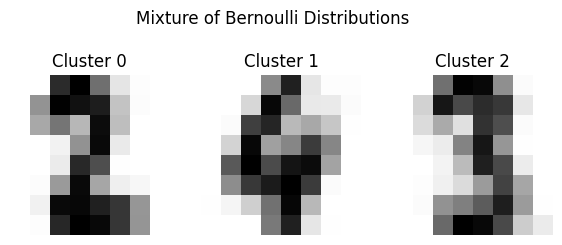

In [ ]:
import matplotlib.pyplot as plt

# Plotting the centroids
plt.figure(figsize=(7, 3))
for i in range(L):
    plt.subplot(1, L, i + 1)
    plt.imshow(meu[i].reshape(8,8), cmap='binary')
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.suptitle('Mixture of Bernoulli Distributions')
plt.show()